In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
np.random.seed(17)
tf.random.set_seed(17)

In [3]:
df_1 = tf.keras.utils.image_dataset_from_directory('G:/Lessons/DS/Try/My_own/Pnevmonia/Archive/chest_xray/train/', labels='inferred', seed = 17)

Found 5216 files belonging to 2 classes.


In [4]:
df_2 = tf.keras.utils.image_dataset_from_directory('G:/Lessons/DS/Try/My_own/Pnevmonia/Archive/chest_xray/val', labels = 'inferred', seed = 17)


Found 16 files belonging to 2 classes.


In [6]:
model = tf.keras.models.load_model('canser_predict_ver_1_1')

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
        
    tf.keras.layers.Conv2D(96, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
   
   tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 96)      55392     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 96)        0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 62, 62, 96)        384       
 chNormalization)                                                
                                                      

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

In [10]:
stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                          patience=4,
                                           verbose=1)

In [11]:
history = model.fit(df_1,
                    validation_data=(df_2),
                    batch_size=1000,
                    epochs=10,
                   )

Epoch 1/10


163/163 [==============================] - 184s 1s/step - loss: 0.3769 - accuracy: 0.9385 - val_loss: 0.2496 - val_accuracy: 0.8750
Epoch 2/10
163/163 [==============================] - 187s 1s/step - loss: 0.0908 - accuracy: 0.9691 - val_loss: 0.5826 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 197s 1s/step - loss: 0.0521 - accuracy: 0.9824 - val_loss: 0.2761 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 201s 1s/step - loss: 0.0418 - accuracy: 0.9854 - val_loss: 0.2177 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 194s 1s/step - loss: 0.0267 - accuracy: 0.9895 - val_loss: 0.0776 - val_accuracy: 0.9375
Epoch 6/10
163/163 [==============================] - 195s 1s/step - loss: 0.0104 - accuracy: 0.9973 - val_loss: 0.0441 - val_accuracy: 1.0000
Epoch 7/10
163/163 [==============================] - 189s 1s/step - loss: 0.0199 - accuracy: 0.9929 - val_loss: 0.1030 - val_accuracy: 1.00

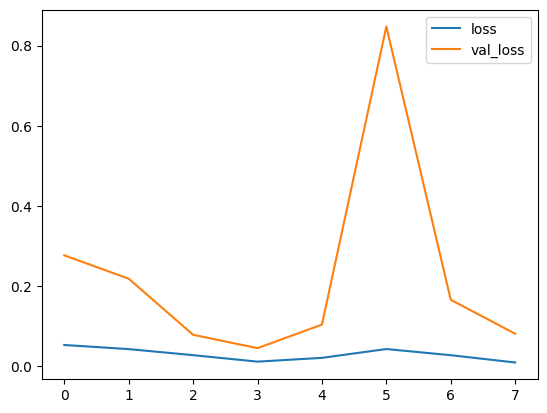

In [15]:
plt.plot(history.history['loss'][2:])
plt.plot(history.history['val_loss'][2:])
plt.legend(['loss', 'val_loss'])

In [26]:
print(f"Максимальная точность тренировочной выборки {round(max(history.history['accuracy']), 3)}.")
print(f"Максимальная точность валидационной выборки {round(max(history.history['val_accuracy']), 3)}.")

Максимальная точность тренировочной выборки 0.997.
Максимальная точность валидационной выборки 1.0.


In [23]:
model.save("pnevm_predict_ver_1_1")

INFO:tensorflow:Assets written to: pnevm_predict_ver_1_1\assets


INFO:tensorflow:Assets written to: pnevm_predict_ver_1_1\assets


In [28]:
test = tf.keras.utils.image_dataset_from_directory('G:/Lessons/DS/Try/My_own/Pnevmonia/Archive/chest_xray/test', labels = 'inferred', seed = 17)

Found 624 files belonging to 2 classes.


In [31]:
test_pred = model.evaluate(
    x=test,
    batch_size=None,
    verbose="auto",
    sample_weight=None,
    steps=None,
    callbacks=None,
    return_dict=False,
)

20/20 [==============================] - 5s 221ms/step - loss: 2.0576 - accuracy: 0.7308


In [33]:
print(f"Точность тестовой выборки {round(test_pred[1], 3)}.")

Точность тестовой выборки 0.731.


In [ ]:
# получил низкую точность на тестовой выборке. Нужна доработка текущей модели, либо использование уже готовой предобученой модели.